In [18]:
from datetime import datetime
import random
from importlib import reload
from helpers import count_infected, count_dead, count_recovered, Results
from person import Person
from matplotlib import pyplot as plt
from propagator import Propagator

In [19]:
def get_results(people, propagator, n_steps) -> Results:
    results = Results()

    for step_index in range(n_steps):
        results.day.append(step_index)
        results.infected_count.append(count_infected(people))
        results.dead_count.append(count_dead(people))
        results.recovered_count.append(count_recovered(people))

        propagator.step()

    return results


def plot_results(results: Results):
    fig = plt.figure(dpi=200)
    plt.yscale('log')
    plt.plot(results.day, results.infected_count)
    plt.plot(results.day, results.dead_count)
    plt.plot(results.day, results.recovered_count)

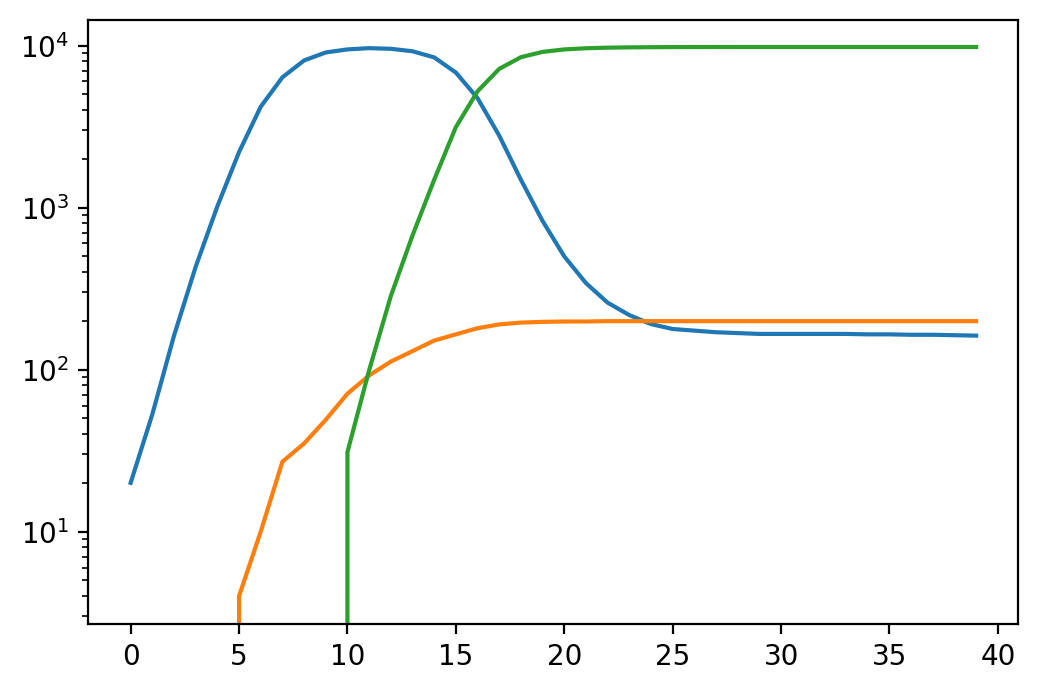

In [20]:
random.seed(datetime.now())

people: [Person] = []
for _ in range(10000):
    people.append(Person())

for person in people:
    person.contacts = random.sample(people, 10)

n_initial_infected = 20
initial_infected = random.sample(people, n_initial_infected)
for initial_infected_person in initial_infected:
    initial_infected_person.infected = True

propagator = Propagator(people, rate=0.1, mortality=0.02, infection_length=10)


results = get_results(people, propagator,40)

plot_results(results)